In [16]:
from overlaps import (
    read_overlaps_from_file, merge_multiple_predictions, compute_crispr_overlaps
)
from misclassifications import get_misclassifications, label_misclassifications, LABELERS, groupby_gene
from main import OVERLAP_FILENAME
from df_loader import CrisprDFLoader, PredDFLoader
from schema import DFSchema
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_rows', 100) 

In [17]:
CRISPR_FILENAME = "/oak/stanford/groups/engreitz/Projects/Benchmarking/CRISPR_data/EPCrisprBenchmark_ensemble_data_GRCh38.tsv.gz"
PRED_FILENAME = "/oak/stanford/groups/engreitz/Users/atan5133/ABC-Enhancer-Gene-Prediction/results/K562_dhs_noqnorm/Predictions/EnhancerPredictionsAllPutative.tsv.gz"
THRESHOLD = 0.013
TSS_REF_FILE = "resources/genome_annotations/RefSeqCurated.170308.bed.CollapsedGeneBounds.hg38.TSS500bp.bed"

In [18]:
# overlaps = read_overlaps_from_file(OVERLAP_FILENAME)
pred_df = PredDFLoader(PRED_FILENAME, TSS_REF_FILE, THRESHOLD, score_col='ABC.Score').load()
crispr_df = CrisprDFLoader(CRISPR_FILENAME, TSS_REF_FILE).load()
overlap_df = compute_crispr_overlaps(
    crispr_df, pred_df
)
overlaps = merge_multiple_predictions(overlap_df, THRESHOLD)

/oak/stanford/groups/engreitz/Users/atan5133/.conda/envs/scripts/lib/python3.9/site-packages/bioframe/ops.py:573: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_input_2[is_na_right] = None
/oak/stanford/groups/engreitz/Users/atan5133/.conda/envs/scripts/lib/python3.9/site-packages/bioframe/ops.py:573: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_input_2[is_na_right] = None
/oak/stanford/groups/engreitz/Users/atan5133/.conda/envs/scripts/lib/python3.9/site-packages/bioframe/ops.py:573: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompat

In [19]:
misclass_df = get_misclassifications(overlaps)
label_misclassifications(misclass_df)
pd.set_option('display.max_rows', 100) 

In [20]:
for labeler in LABELERS:
    print(labeler.summarize_category_count(misclass_df))
    print()

True    430
Name: FalsePos_Category, dtype: int64

True    140
Name: FalseNeg_Category, dtype: int64

DistToTSSSize_Category
medium (<= 100000 bp)    350
large (> 100000 bp)      137
small (<= 10000 bp)       83
Name: count, dtype: int64

Top5Gene_Category
MYC         10
ITGA5        9
BCAT2        7
RNASEH2A     7
NDUFB9       6
Name: count, dtype: int64

True    56
Name: MultiplePredictions_Category, dtype: int64

EnhancerSize_Category
Normal    394
Large     176
Name: count, dtype: int64



In [21]:
relevant_cols = ['chrom_pred', 'start_crispr','end_crispr', 'name_crispr', 'distance_pred', 'activity_base_pred', 'IsSignificant_crispr', 'IsSignificant_pred', 'ABC.Score.Numerator_pred', 'ABC.Score_pred', 'TargetGene_crispr']

In [22]:
false_pos = overlaps[(overlaps["IsSignificant_crispr"] == False) & (overlaps["IsSignificant_pred"] == True)]
group = false_pos.groupby("TargetGene_crispr")
group.size().sort_values()[-10:]

TargetGene_crispr
FUT1        4
PSMD13      4
PQBP1       4
NFE2        4
LYL1        5
NUCB1       5
NDUFB9      6
RNASEH2A    7
BCAT2       7
ITGA5       9
dtype: int64

In [23]:
overlaps[relevant_cols].sort_values("activity_base_pred", ascending=False)[:20]

,chrom_pred,start_crispr,end_crispr,name_crispr,distance_pred,activity_base_pred,IsSignificant_crispr,IsSignificant_pred,ABC.Score.Numerator_pred,ABC.Score_pred,TargetGene_crispr
9600,chrX,49190908,49191428,GATA1|chrX:49047365-49047885:*,404676.0,63.199211,False,False,0.044244,0.005082,GATA1
10013,chrX,49190908,49191428,PLP2|chrX:49047365-49047885:*,19413.0,63.199211,False,True,0.992694,0.138243,PLP2
9805,chrX,49190908,49191428,HDAC6|chrX:49047365-49047885:*,389234.0,63.199211,False,False,0.046042,0.003737,HDAC6
10222,chrX,49190908,49191428,PQBP1|chrX:49047365-49047885:*,293338.0,63.199211,False,False,0.061514,0.007651,PQBP1
9353,chr9,120896697,120897631,PHF19|chr9:123658975-123659909:.,19876.5,52.776740,True,True,0.809191,0.085098,PHF19
79,chr1,26619808,26621780,STMN1|chr1:26946299-26948271:.,714556.5,51.821692,False,False,0.020265,0.004736,STMN1
100,chr1,26619808,26621780,PIGV|chr1:26946299-26948271:.,166903.5,51.821692,False,True,0.089870,0.016023,PIGV
8303,chr7,25862086,25862957,CBX3|chr7:25901706-25902577:.,338662.5,44.471981,False,False,0.037363,0.011401,CBX3
8306,chr7,25862086,25862957,HNRNPA2B1|chr7:25901706-25902577:.,338245.5,44.471981,False,False,0.037410,0.011399,HNRNPA2B1
8298,chr7,25862086,25862957,CYCS|chr7:25901706-25902577:.,737186.5,44.471981,False,False,0.016844,0.005663,CYCS


In [24]:
len(overlaps[overlaps["TargetGene_crispr"] == "COPZ1"][relevant_cols])

101

In [25]:
def get_pct_activity(df, in_pos=True):
    col_name = "activity_base_pred"
    filtered = df[df["IsSignificant_crispr"] == in_pos]
    return filtered[col_name].sum() / df[col_name].sum()

In [26]:
get_pct_activity(overlaps,in_pos=True)

0.09015623509043992

In [27]:
get_pct_activity(overlaps, in_pos=False)

0.90984376490956

In [28]:
get_pct_activity(overlap_df, in_pos=True)

0.08976787114135874

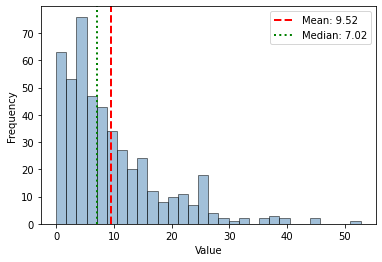

In [29]:
activites = overlaps[overlaps["IsSignificant_crispr"]]["activity_base_pred"].fillna(0)
mean_value = np.mean(activites)
median_value = np.median(activites)

plt.hist(activites, bins=30, alpha=0.5, color='steelblue', edgecolor='black')
plt.axvline(mean_value, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='g', linestyle='dotted', linewidth=2, label=f'Median: {median_value:.2f}')
plt.legend()
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [7]:
false_pos = len(misclass_df[(misclass_df["EnhancerSize_Category"] == "Large") & (misclass_df["FalsePos_Category"] == True)])
false_neg = len(misclass_df[(misclass_df["EnhancerSize_Category"] == "Large") & (misclass_df["FalseNeg_Category"] == True)])
print(f"False pos large enhancers: {false_pos}\nFalse neg large enhancers: {false_neg}")

False pos large enhancers: 304
False neg large enhancers: 96


In [8]:
gata_1 = overlap_df[overlap_df[DFSchema.TARGET_GENE + DFSchema.CRISPR_SUFFIX] == "GATA1"]
gata_1 = gata_1.sort_values(by="activity_base_pred", ascending=False)
gata_1[["activity_base_pred", "hic_contact_pl_scaled_adj_pred", "ABC.Score_pred", "Regulated_crispr"]][:50]


KeyError: "['hic_contact_pl_scaled_adj_pred', 'ABC.Score_pred'] not in index"

In [ ]:
# Look at GATA1 classification
def print_target_gene_misclassification(target_gene):
    incorrect = len(misclass_df[misclass_df[DFSchema.TARGET_GENE + DFSchema.CRISPR_SUFFIX] == target_gene])
    total_pairs = len(overlaps[overlaps[DFSchema.TARGET_GENE + DFSchema.CRISPR_SUFFIX] == target_gene])
    print(f"Misclassified {incorrect}/{total_pairs} eg pairs for {target_gene}.\n{int(100 * incorrect/total_pairs)}% incorrect")

print_target_gene_misclassification("GATA1")
print_target_gene_misclassification("PLP2")

In [ ]:
# Example queries
print(misclass_df["FalsePos_Category"].value_counts().filter([True]))
print()
print(len(misclass_df.query("FalseNeg_Category == True")))

In [ ]:
sizes = pred_df["end"] - pred_df["start"]
num_normal = (sizes == 500).sum()
num_large = (sizes > 500).sum()

In [ ]:
num_normal

In [ ]:
num_large